In [68]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read the input file and check the data dimension

In [4]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
german_credit_df = pd.read_csv('german_credit.csv')

## Performing EDA

In [6]:
german_credit_df.sample(4)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
63,1,0 <= ... < 200 DM,48,no credits taken/ all credits paid back duly,business,14421,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",25,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
342,0,0 <= ... < 200 DM,18,existing credits paid back duly till now,domestic appliances,3213,500 <= ... < 1000 DM,... < 1 year,1,male : married/widowed,...,3,real estate,25,none,rent,1,skilled employee / official,1,none,yes
548,1,< 0 DM,12,all credits at this bank paid back duly,domestic appliances,626,... < 100 DM,1 <= ... < 4 years,4,female : divorced/separated/married,...,4,real estate,24,bank,own,1,unskilled - resident,1,none,yes
789,1,< 0 DM,40,critical account/ other credits existing (not ...,(vacation - does not exist?),5998,... < 100 DM,1 <= ... < 4 years,4,male : single,...,3,unknown / no property,27,bank,own,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [7]:
german_credit_df.shape

(1000, 21)

In [8]:
german_credit_df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [8]:
german_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

### There are no null values

In [9]:
german_credit_df.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [58]:
german_credit_df_X = german_credit_df.drop('default',axis=1)
german_credit_df_y = german_credit_df['default']
german_credit_df_X_Case1, german_credit_df_X_Case2, german_credit_df_y_Case1, german_credit_df_y_Case2 = train_test_split(german_credit_df_X,german_credit_df_y,test_size=0.5,random_state=1)

In [59]:
print(german_credit_df_X_Case1.shape,german_credit_df_y_Case1.shape)
print(german_credit_df_X_Case2.shape,german_credit_df_y_Case2.shape)

(500, 20) (500,)
(500, 20) (500,)


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
# Print Shape of model data

(500, 61)

In [34]:
categorical_columns = [ col for col in german_credit_df.dtypes.index if german_credit_df.dtypes[col] =='object' ] 
print(categorical_columns)
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(german_credit_df[col].value_counts())

['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

Frequency of Categories for varible account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

Frequency of Categories for varible credit_history
existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64

Frequency of Categories for vari

In [63]:
german_credit_df_Case1_dummies =  pd.get_dummies(german_credit_df_X_Case1,columns=categorical_columns)
german_credit_df_Case1_dummies.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [62]:
german_credit_df_corr = german_credit_df.corr()
german_credit_df_corr

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [44]:
german_credit_df_corr['default']

default                       1.000000
duration_in_month             0.214927
credit_amount                 0.154739
installment_as_income_perc    0.072404
present_res_since             0.002967
age                          -0.091127
credits_this_bank            -0.045732
people_under_maintenance     -0.003015
Name: default, dtype: float64

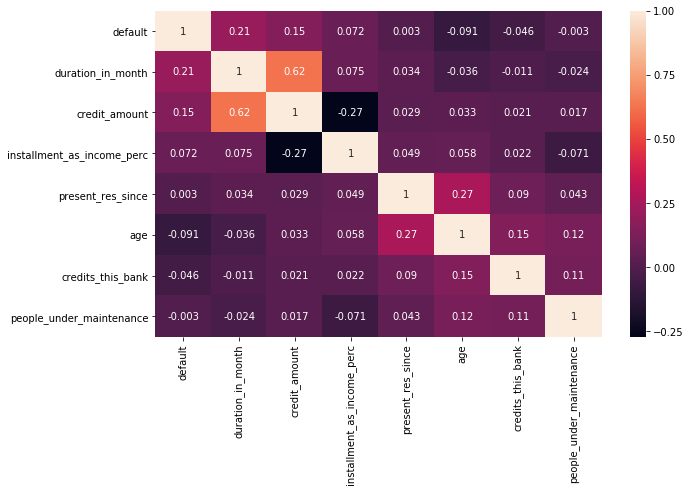

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(german_credit_df_corr, annot=True)

- ###  Credit_amount and duration in months are highly correlated
- ###  age and present_res_since are correlated   
- ###  installment_as_income_perc and credit_amount are -ve ly correlated 

### Drop the original variables which are converted to dummy

In [64]:
print(german_credit_df_Case1_dummies.columns)

Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_0 <= ... < 200 DM',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_r

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [65]:
german_credit_df_X_train, german_credit_df_X_test, german_credit_df_y_Case1_y_train, german_credit_df_y_Case1_y_test = train_test_split(german_credit_df_Case1_dummies,german_credit_df_y_Case1,test_size=0.3,random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

rf.fit(german_credit_df_X_train, german_credit_df_y_Case1_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [100]:
y_pred = rf.predict(german_credit_df_X_test)

# Verificaar os resultados obtidos
print(accuracy_score(german_credit_df_y_Case1_y_test,y_pred))
print("\n")
print(confusion_matrix(german_credit_df_y_Case1_y_test, y_pred))

0.7533333333333333


[[96  8]
 [29 17]]


### Q6 Show the list of the features importance( 1 Marks)

In [101]:
feature_Importance_df = pd.DataFrame(rf.feature_importances_, columns = ["Feature_Importance"], index = german_credit_df_X_train.columns)
feature_Importance_df.sort_values(by=['Feature_Importance'], ascending=False)

,Feature_Importance
credit_amount,0.099335
age,0.087813
duration_in_month,0.061128
account_check_status_no checking account,0.045243
installment_as_income_perc,0.042206
present_res_since,0.032136
account_check_status_< 0 DM,0.027337
purpose_car (new),0.024779
credit_history_critical account/ other credits existing (not at this bank),0.022426
credits_this_bank,0.019030


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [78]:
# Use below values
num_folds = 10
seed = 77

In [79]:
#Validate the Random Forest model build above using k fold
kfold = KFold(n_splits=num_folds, random_state=seed)

In [106]:
for train_index, test_index in kfold.split(german_credit_df_Case1_dummies):
    X_train, X_test, y_train, y_test = german_credit_df_Case1_dummies.iloc[train_index], german_credit_df_Case1_dummies.iloc[test_index], german_credit_df_y_Case1.iloc[train_index], german_credit_df_y_Case1.iloc[test_index]
    rf.fit(X_train, y_train)


In [107]:
results = cross_val_score(rf, german_credit_df_X_train, german_credit_df_y_Case1_y_train, cv=kfold)
results

array([0.65714286, 0.74285714, 0.65714286, 0.77142857, 0.8       ,
       0.71428571, 0.82857143, 0.71428571, 0.71428571, 0.65714286])

In [0]:
#Calculate Mean score

In [110]:
print("Mean score is %f "%(results.mean()))

Mean score is 0.725714 


In [0]:
# Calculate score standard deviation using std()

In [109]:
print("standard deviation is %f "%(results.std()))

standard deviation is 0.057428 


# Q8 Print the confusion matrix( 1 Marks)

In [119]:
y_pred_kfold = rf.predict(german_credit_df_X_test)
print(confusion_matrix(german_credit_df_y_Case1_y_test, y_pred_kfold))

[[104   0]
 [  3  43]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [113]:
print(accuracy_score(german_credit_df_y_Case1_y_test,y_pred_kfold))
print(classification_report(german_credit_df_y_Case1_y_test, y_pred_kfold))

0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       104
           1       1.00      0.93      0.97        46

   micro avg       0.98      0.98      0.98       150
   macro avg       0.99      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [92]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve,auc

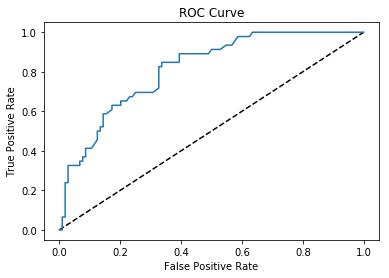

In [93]:
#Predicting proba
y_pred_prob = rf.predict_proba(german_credit_df_X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(german_credit_df_y_Case1_y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [94]:
auc(fpr, tpr)

0.8137541806020068

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [125]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [126]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
german_credit_df_Case1_dummies =  pd.get_dummies(german_credit_df_X_Case1,columns=categorical_columns)
german_credit_df_Case2_dummies =  pd.get_dummies(german_credit_df_X_Case2,columns=categorical_columns)
for i in range(bootstrap_iteration):
    X_, y_ = resample(german_credit_df_Case1_dummies, german_credit_df_y_Case1)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(german_credit_df_Case2_dummies)
    acc = accuracy_score(y_pred, german_credit_df_y_Case2)
    accuracy.append(acc)

In [127]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7548
Standard deviation:  0.009927738916792694
